import done


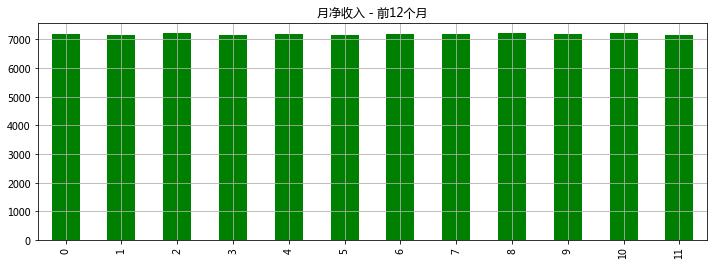

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as psl
psl.use('seaborn-colorblind')
plt.show()
print('import done')

def caculate_tax(salary):
    tax = 0
    while salary > 3500:
        if salary > 83500:
            tax += (salary - 83500) * 0.45
            salary = 83500
        elif salary > 58500:
            tax += (salary - 58500) * 0.35
            salary = 58500
        elif salary > 38500:
            tax += (salary - 38500) * 0.3
            salary = 38500
        elif salary > 12500:
            tax += (salary - 12500) * 0.25
            salary = 12500
        elif salary > 8000:
            tax += (salary - 8000) * 0.2
            salary = 8000
        elif salary > 4500:
            tax += (salary - 4500) * 0.1
            salary = 4500
        elif salary > 3500:
            tax += (salary - 3500) * 0.03
            salary = 3500    
    return tax

# print(tax_total(50000))

def caculate_insurance(salary):
    if salary <= 21396:
        return salary * 0.175
    else:
        return 3744.58
# print(insurance_caculate(15000))

def bonus_mock(b_avg):
    # 模拟十年奖金 - 120个正态分布的数字，均值为b_avg，标准差为200
    return pd.Series(np.random.normal(loc = b_avg, scale = 200, size = 120))

# test_bonus = bonus_mock(1500)
# print(test_bonus[:10])
# plt.title("奖金模拟 - 数据分部直方图")
## hist - histogram - 矩阵图
## bins - 条形数 - 分组数
# plt.hist(test_bonus, bins = 10)
# plt.grid()

# print(["🏊‍♀️" for i in range(5)])

def caculate_final_income(salary, bonus_average):
    data_frame_income = pd.DataFrame({
        '月薪': [salary for i in range(120)],
        '五险一金': [caculate_insurance(salary) for i in range(120)],
        '奖金': bonus_mock(bonus_average)
    })
    data_frame_income['计税部分'] = data_frame_income['月薪'] + data_frame_income['奖金']
    # apply()方法默认作用于所有数据
    # lambda作为一个表达式，定义了一个匿名函数 - x是入参，冒号后面是运算方法
    data_frame_income['个人所得税'] = data_frame_income['计税部分'].apply(lambda x : caculate_tax(x))
    data_frame_income['月净收入'] = data_frame_income['月薪'] - data_frame_income['五险一金'] - data_frame_income['个人所得税']
    
    return data_frame_income

# test_result = caculate_final_income(10000, 1500)
# test_result.head() # 展示前5条

# # iloc：按index取值
# test_result['月净收入'].iloc[:12].plot(kind='bar', figsize = (12,4), color='Green')
# plt.title('月净收入 - 前12个月')
# plt.grid()
